# **Used Cars Price Prediction**

## **Problem Definition**

### **The Context:**

 - The problem explains the significant growth of the pre-owned car market in Inda and how it has surpassed the new car sales. Correctly predicting car prices in this will market will help new startup Cars4U to gain market share and while maximize profits.  This will also help the environment, provide competative pricing which will in turn improve car sales.

### **The objective:**

 - What is the intended goal?
 - The main goal of this excersice is to construct a pricing model capable of accurately predicting used car prices, which will help Cars4U (tech startup) to implement effective pricing strategies and provide competative edge.

### **The key questions:**

- What are the factors effecting the price of used car?
- How to process relvant data accurately?
- Will the the model handle outliers?
- How can the model adapt to changes over time?
- Is there any undue discrimination in the model?


### **The problem formulation**:

We are trying to accurately predict the used car prices in Indian market. Another way too look at this is we are trying to accurately determine the fair value of a used car vehichles by looking at different features that we have at hand. We also need to gain market insight such as seasonality, trends etc to make better decisions.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [83]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)




In [84]:
#mount drive
#drive.mount('/content/drive')



### **Let us load the data**

In [85]:
# load file
df = pd.read_csv("used_cars.csv")

## Data Overview

- Observations
- Sanity checks

In [86]:
df.shape

(7253, 14)

- 7253 rows and 14 columns


## **Exploratory Data Analysis**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


In [88]:
df.head()



,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [89]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN



- **S.No** is a Serial number and does not provide any value
- New_price has very high number of missing values followed by price, power seats, engine and mileage. The rest of the columns are populated.
- kilometers, mileage, engine power and prices are numeric
- name, location, fuel_type, transmission and owner are categorical varibales.
- year appears to be a categorical column but can be chanegd to numerical by calculating age.



In [90]:
# dropping S.No as it has no value
df.drop(columns = 'S.No.', inplace = True)

In [91]:
df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_price,Price
count,7253.000000,7.253000e+03,7251.000000,7207.000000,7078.000000,7200.000000,1006.000000,6019.000000
mean,2013.365366,5.869906e+04,18.141580,1616.573470,112.765214,5.280417,22.779692,9.479468
std,3.254421,8.442772e+04,4.562197,595.285137,53.493553,0.809277,27.759344,11.187917
min,1996.000000,1.710000e+02,0.000000,72.000000,34.200000,2.000000,3.910000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,7.885000,3.500000
50%,2014.000000,5.341600e+04,18.160000,1493.000000,94.000000,5.000000,11.570000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,26.042500,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,375.000000,160.000000


- Year needs to be changed to age and since 2019 is max we can use that
- On an avg cars are driven 58000 kms with 75 percentile under 73000 kilometers. There might some outliers in particular max is 6,500,000 km which signals outliers.
- Avg mileage is 18 (indian market so kmpl). There is a min mileage of 0 which might be a data error
- power on avg is 112 (usually for indian market that is bhp)
- avg seats is ~5
- new_price has a lot of missing values
- avg price is 9.4 (units not defined)

In [92]:
categorical_columns = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type']


# Initialize an empty dictionary to store unique values and their counts
unique_values_counts = {}

# Loop through each categorical column and get the unique values and their counts
for col in categorical_columns:
    unique_values_counts[col] = df[col].value_counts()


# Display unique counts and their values
for col, value_counts in unique_values_counts.items():
    print("\nUnique values and their counts in " + col + ":")
    print(value_counts)

# Display the number of unique values
print("\nNumber of unique values in each categorical variable:")
for col, value_counts in unique_values_counts.items():
    print(col + ": " + str(len(value_counts)) + " unique values")


Unique values and their counts in Name:
Name
Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: count, Length: 2041, dtype: int64

Unique values and their counts in Location:
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64

Unique values and their counts in Fuel_Type:
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: in

In [93]:
df.sort_values(by='Kilometers_Driven', ascending=False).head(20)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00
340,Skoda Octavia Ambition Plus 2.0 TDI AT,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5.0,NaN,7.50
1860,Volkswagen Vento Diesel Highline,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.60,5.0,NaN,5.90
358,Hyundai i10 Magna 1.2,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.90,5.0,NaN,2.70
2823,Volkswagen Jetta 2013-2015 2.0L TDI Highline AT,Chennai,2015,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5.0,NaN,13.00
3092,Honda City i VTEC SV,Kolkata,2015,480000,Petrol,Manual,First,17.40,1497.0,117.30,5.0,NaN,5.00
4491,Hyundai i20 Magna Optional 1.2,Bangalore,2013,445000,Petrol,Manual,First,18.50,1197.0,82.90,5.0,NaN,4.45
6921,Maruti Swift Dzire Tour LDI,Jaipur,2012,350000,Diesel,Manual,First,23.40,1248.0,74.00,5.0,NaN,NaN
3649,Tata Indigo LS,Jaipur,2008,300000,Diesel,Manual,First,17.00,1405.0,70.00,5.0,NaN,1.00
1528,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,Hyderabad,2005,299322,Diesel,Manual,First,12.80,2494.0,102.00,8.0,NaN,4.00


In [94]:
#drop 2328 index since it is the only outlier 6500000 for a car manufactured in 2017
df.drop(index = 2328, inplace = True)

In [95]:
df.sort_values(by='Mileage', ascending=True).head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
2597,Hyundai Santro Xing XP,Pune,2007,70000,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,1.12
2343,Hyundai Santro AT,Hyderabad,2006,74483,Petrol,Automatic,First,0.0,999.0,NaN,5.0,NaN,2.30
5270,Honda City 1.5 GXI,Bangalore,2002,53000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,1.85
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0,1968.0,NaN,5.0,NaN,5.45
6857,Land Rover Freelander 2 TD4 SE,Mumbai,2011,87000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,NaN
443,Hyundai Santro GLS I - Euro I,Coimbatore,2012,50243,Petrol,Manual,First,0.0,1086.0,NaN,5.0,NaN,3.35
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0,1086.0,NaN,5.0,NaN,1.17
5022,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,NaN,26.00
5016,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0,2179.0,115.0,5.0,NaN,15.50
2542,Hyundai Santro GLS II - Euro II,Bangalore,2011,65000,Petrol,Manual,Second,0.0,NaN,NaN,NaN,NaN,3.15


- There seems to be many columns with mileage 0. This will be fixed in feature engineering

In [96]:
# find the number of columns with zero mileage
(df['Mileage'] == 0).sum()

81

There are 81 columns with 0 mileage. In feature engineering we will have to impute this.

## **Univariate Analysis**

**Questions:**

1. Do univariate analysis for numerical and categorical variables?
2. Check the distribution of the different variables? is the distributions skewed?
3. Do we need to do log_transformation, if so for what variables we need to do?
4. Perfoem the log_transformation(if needed) and write down your observations?

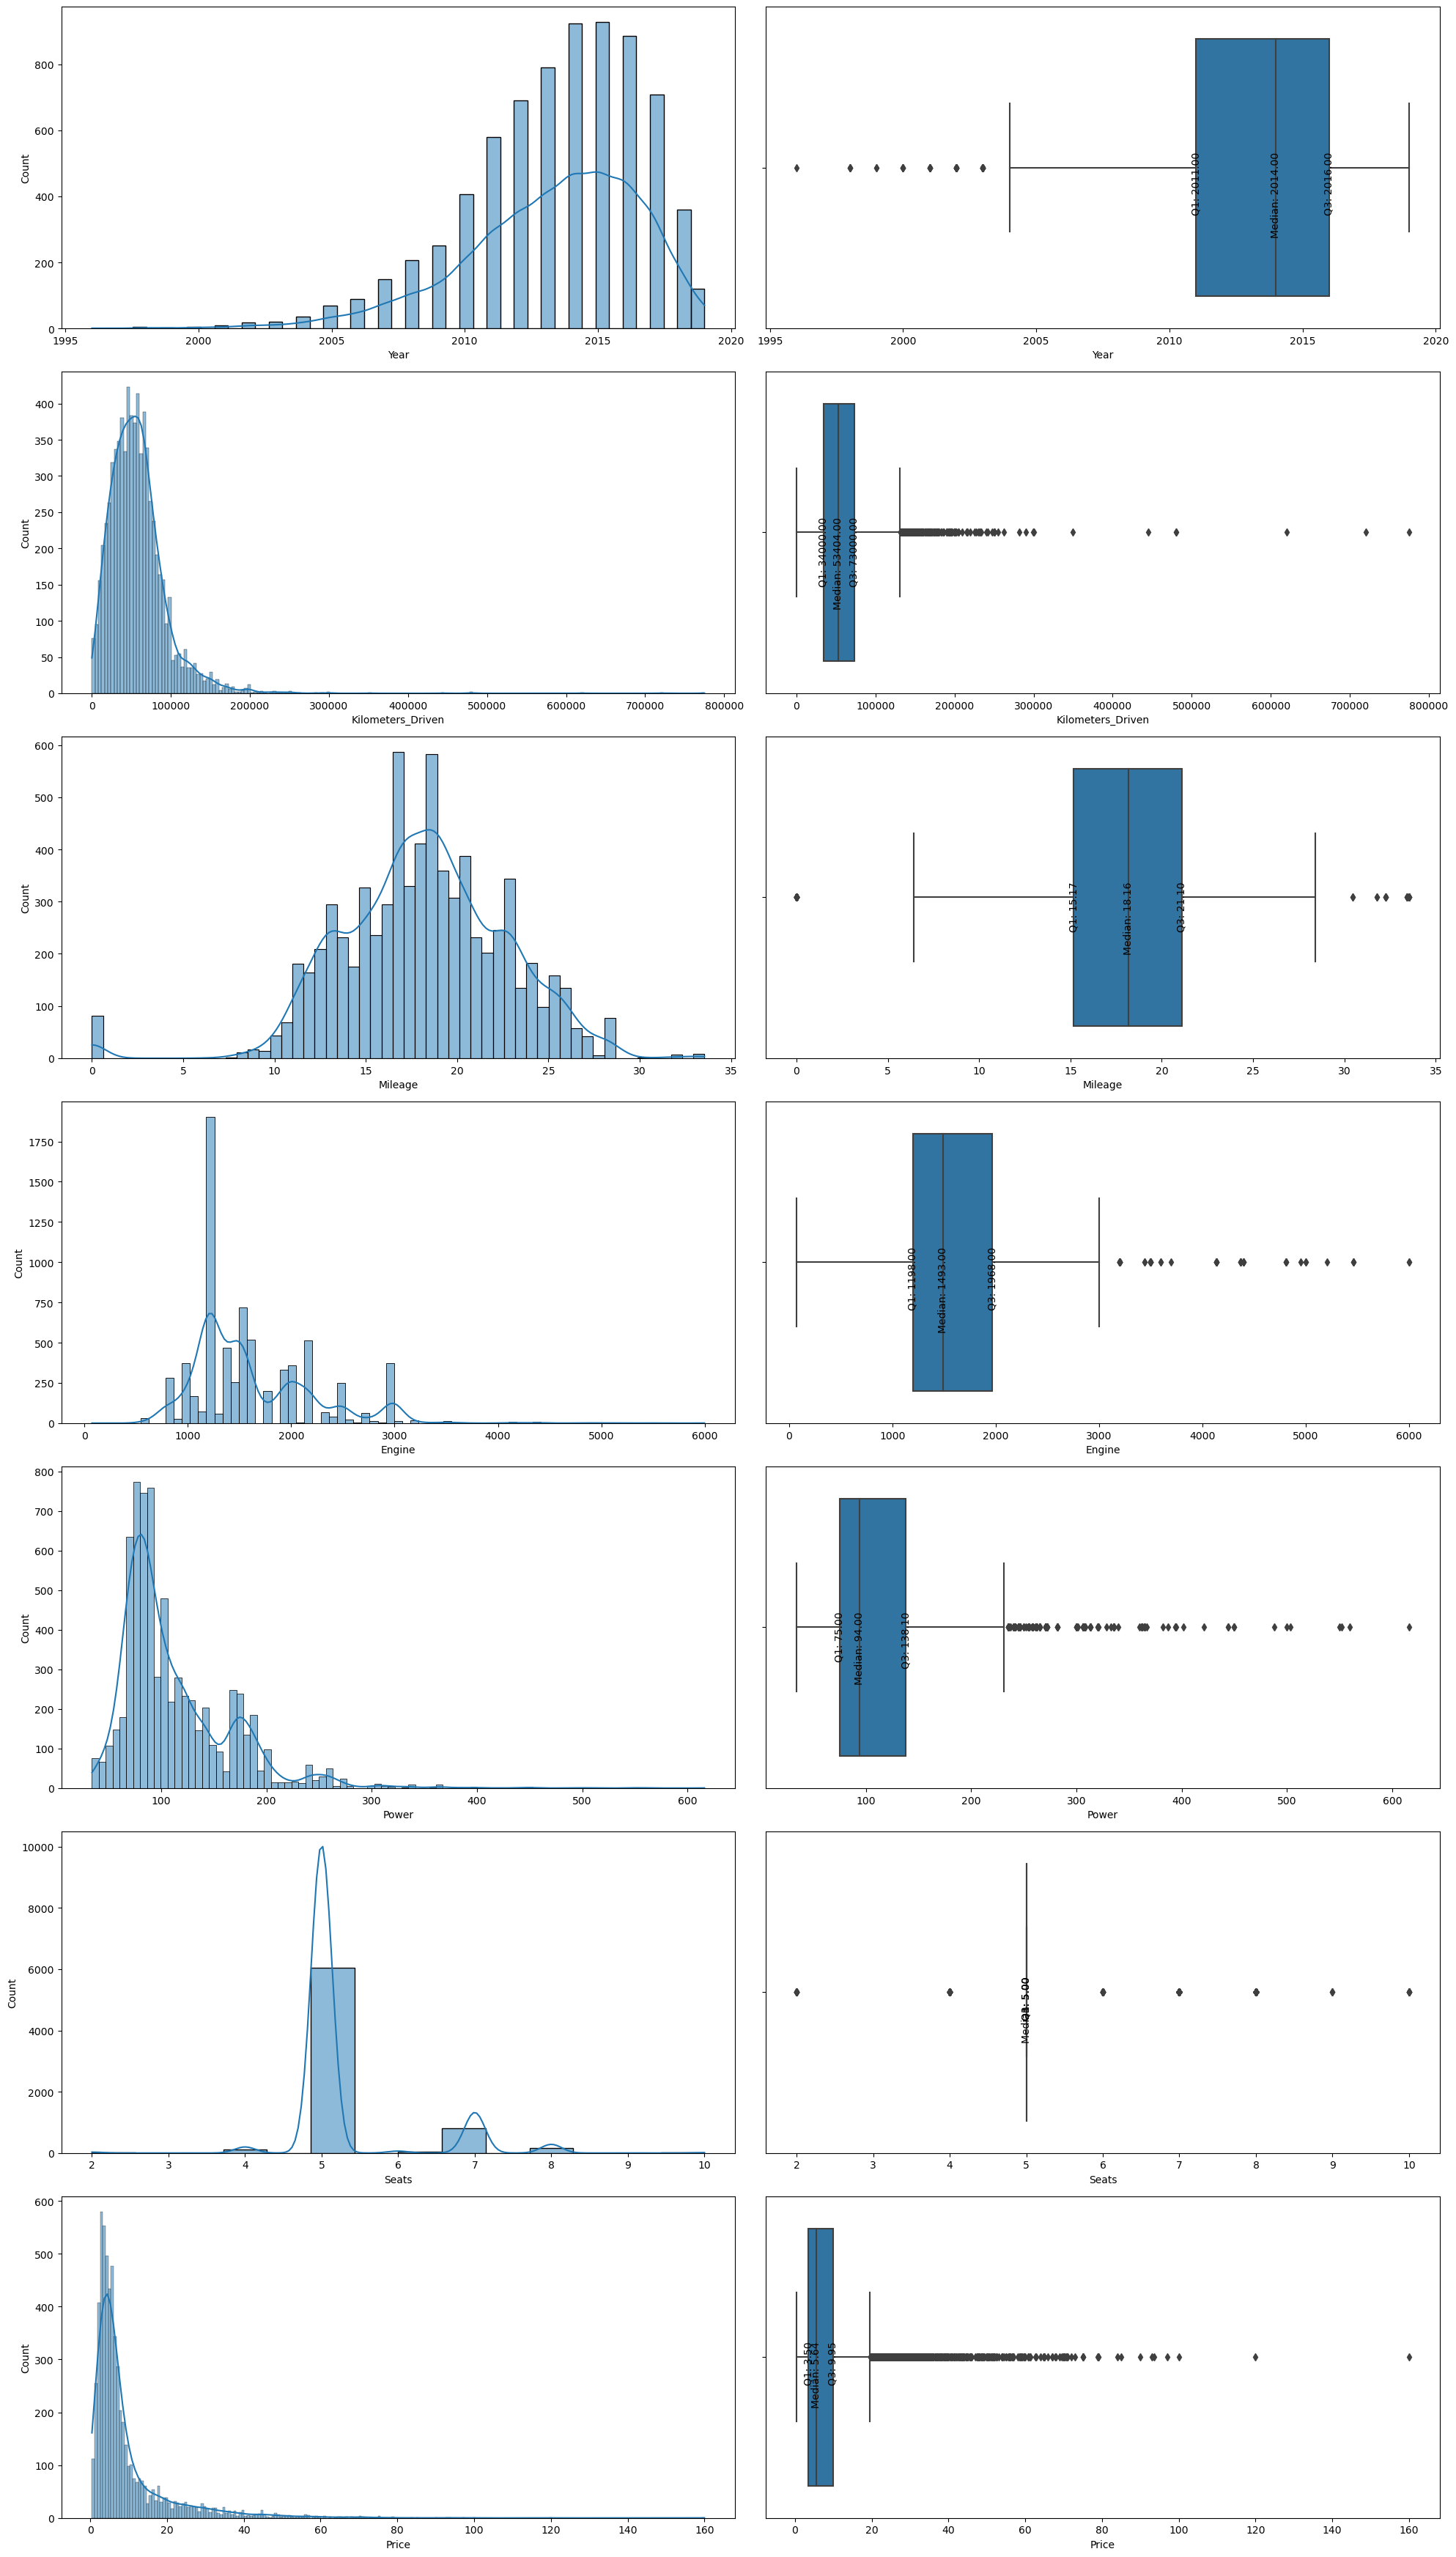

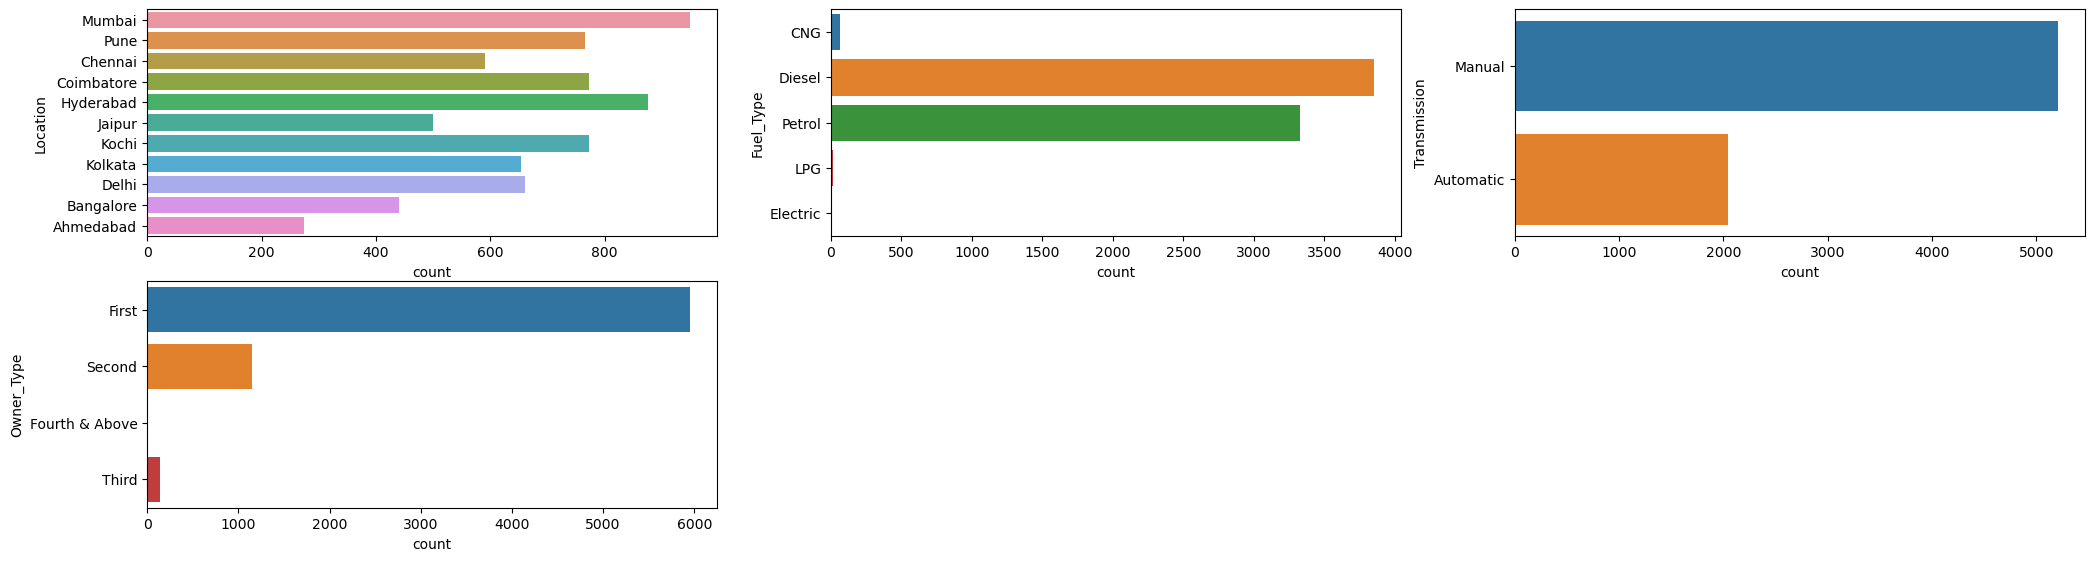

In [97]:
numerical_features = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
categorical_features = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']



# Plotting the distribution of numerical features
fig = plt.figure(figsize=(20, 35))

# Create a grid specification for a grid with 7 rows and 2 columns
gs = gridspec.GridSpec(7, 2, figure=fig)

for i, feature in enumerate(numerical_features):
    # Create a subplot for the histogram
    ax_hist = fig.add_subplot(gs[i, 0])
    sns.histplot(df[feature], kde=True, ax=ax_hist)

    # Create a subplot for the boxplot
    ax_box = fig.add_subplot(gs[i, 1])
    sns.boxplot(x=df[feature], ax=ax_box)

     # Annotate boxplot with statistical values
    quartiles = df[feature].quantile([0.25, 0.5, 0.75])

    # Add annotations for the quartiles and whiskers
    ax_box.annotate(f'Q1: {quartiles[0.25]:.2f}', xy=(quartiles[0.25], 0.55), xycoords=('data', 'axes fraction'),
                    ha='center', va='top', fontsize=10, color='black', rotation=90)
    ax_box.annotate(f'Median: {quartiles[0.5]:.2f}', xy=(quartiles[0.5], 0.55), xycoords=('data', 'axes fraction'),
                    ha='center', va='top', fontsize=10, color='black', rotation=90)
    ax_box.annotate(f'Q3: {quartiles[0.75]:.2f}', xy=(quartiles[0.75], 0.55), xycoords=('data', 'axes fraction'),
                    ha='center', va='top', fontsize=10, color='black', rotation=90)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()




# Plotting the count of categorical features
plt.figure(figsize=(25, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(y=df[feature])
plt.show()

- Most cars in the dataset are from recent years with median as 2014. This might be beacuse newer cars are in demand
- 35K to 70K is the range in between cars are driven
- The median mileage is around 18
- engine sizes vary been 1100 to 1900 with median 1400 indicating mid engines are preferred
- same can be observed with power. Between 80 - 120 bhp meaning medium powered engines
- most cars hasve 5 seats
- The price is right sckewed between 2 and 10
- Mumbai seems to be the largest car market of all in the dataset
- There are slightly more number of Diesel than Petrol cars indicating preferance for diesel may be because of cost of fuel
- More manual cars are sold in the used market than automatic
- first owner vehichles are sold significanlly more often

In [98]:
# log transform price and kilometers_driven since they are skewed
df['Price_Log'] = np.log(df['Price'])
df['Kilometers_Driven_Log'] = np.log(df['Kilometers_Driven'])


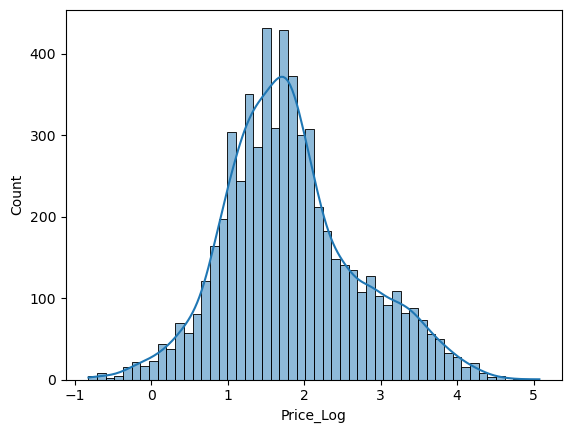

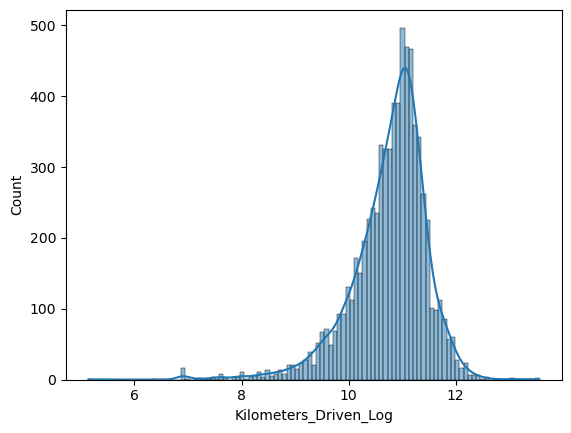

In [99]:
# plot Price_Log and Kilometers_Driven_Log histplots
sns.histplot(df['Price_Log'], kde=True)
plt.show()
sns.histplot(df['Kilometers_Driven_Log'], kde=True)
plt.show()




- both Price_Log and Kilometers_Driven_Log have reduced skewness

## **Bivariate Analysis**

**Questions:**

1. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. Plot a box plot for target variable and categorical variable 'Location' and write your observations?

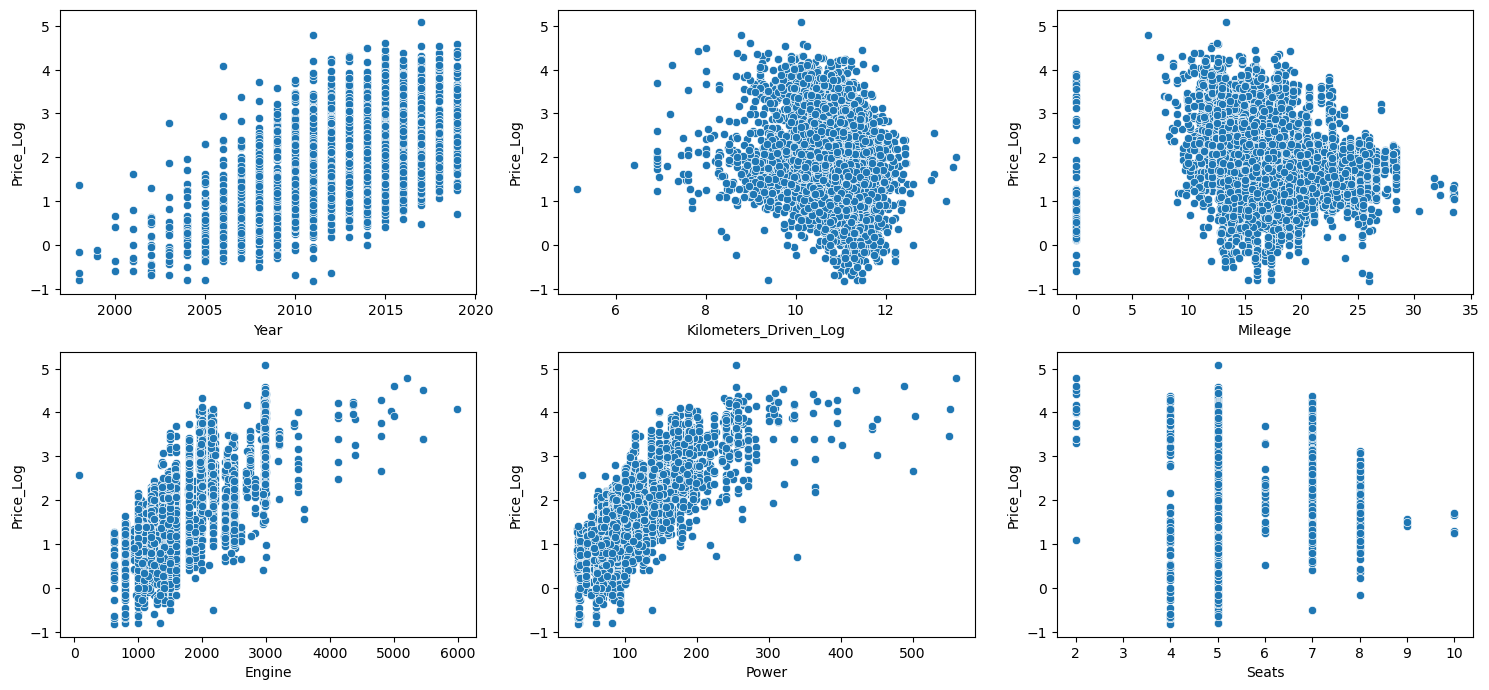

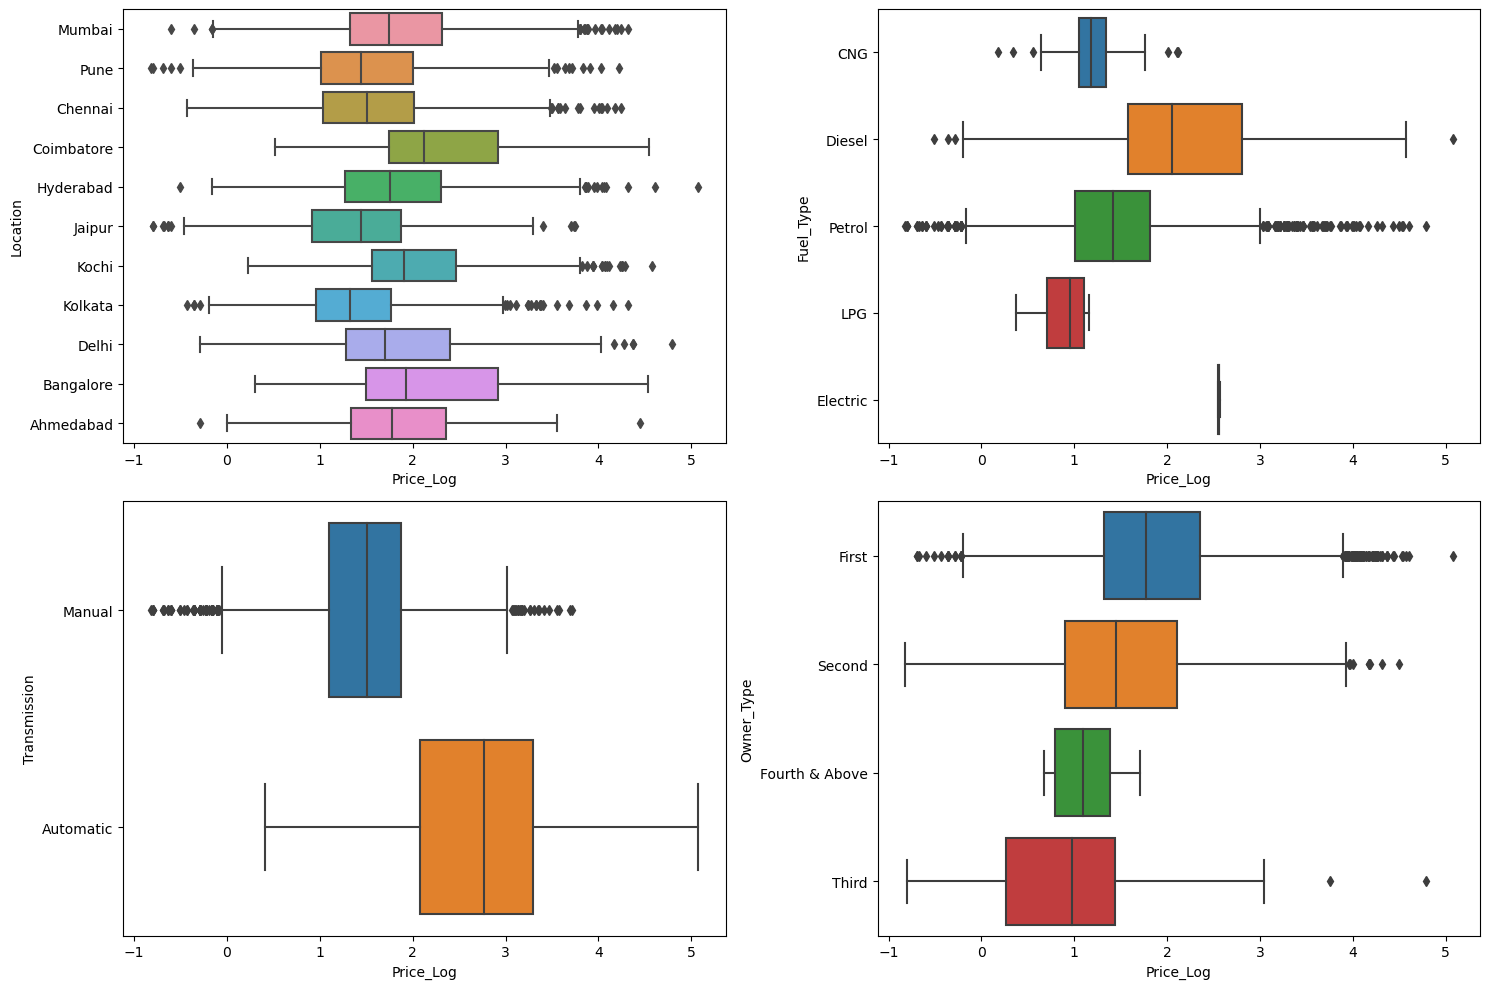

In [100]:
# Scatter plots for numerical variables
plt.figure(figsize=(15, 10))

# Price_Log vs year
plt.subplot(3, 3, 1)
sns.scatterplot(x='Year', y='Price_Log', data=df)

# Price_Log vs Kilometers_Driven_Log
plt.subplot(3, 3, 2)
sns.scatterplot(x='Kilometers_Driven_Log', y='Price_Log', data=df)

# Price_Log vs mileage
plt.subplot(3, 3, 3)
sns.scatterplot(x='Mileage', y='Price_Log', data=df)

# Price_Log vs engine
plt.subplot(3, 3, 4)
sns.scatterplot(x='Engine', y='Price_Log', data=df)

# Price_Log vs power
plt.subplot(3, 3, 5)
sns.scatterplot(x='Power', y='Price_Log', data=df)

# Price_Log vs seats
plt.subplot(3, 3, 6)
sns.scatterplot(x='Seats', y='Price_Log', data=df)


plt.tight_layout()
plt.show()

# Box plots for categorical variables using Price_Log

plt.figure(figsize=(15, 10))

# Price_Log vs Location
plt.subplot(2, 2, 1)
sns.boxplot(x='Price_Log', y='Location', data=df)

# Price_Log vs Fuel_Type
plt.subplot(2, 2, 2)
sns.boxplot(x='Price_Log', y='Fuel_Type', data=df)

# Price_Log vs Transmission
plt.subplot(2, 2, 3)
sns.boxplot(x='Price_Log', y='Transmission', data=df)


# Price_Log vs Owner_Type
plt.subplot(2, 2, 4)
sns.boxplot(x='Price_Log', y='Owner_Type', data=df)


plt.tight_layout()
plt.show()

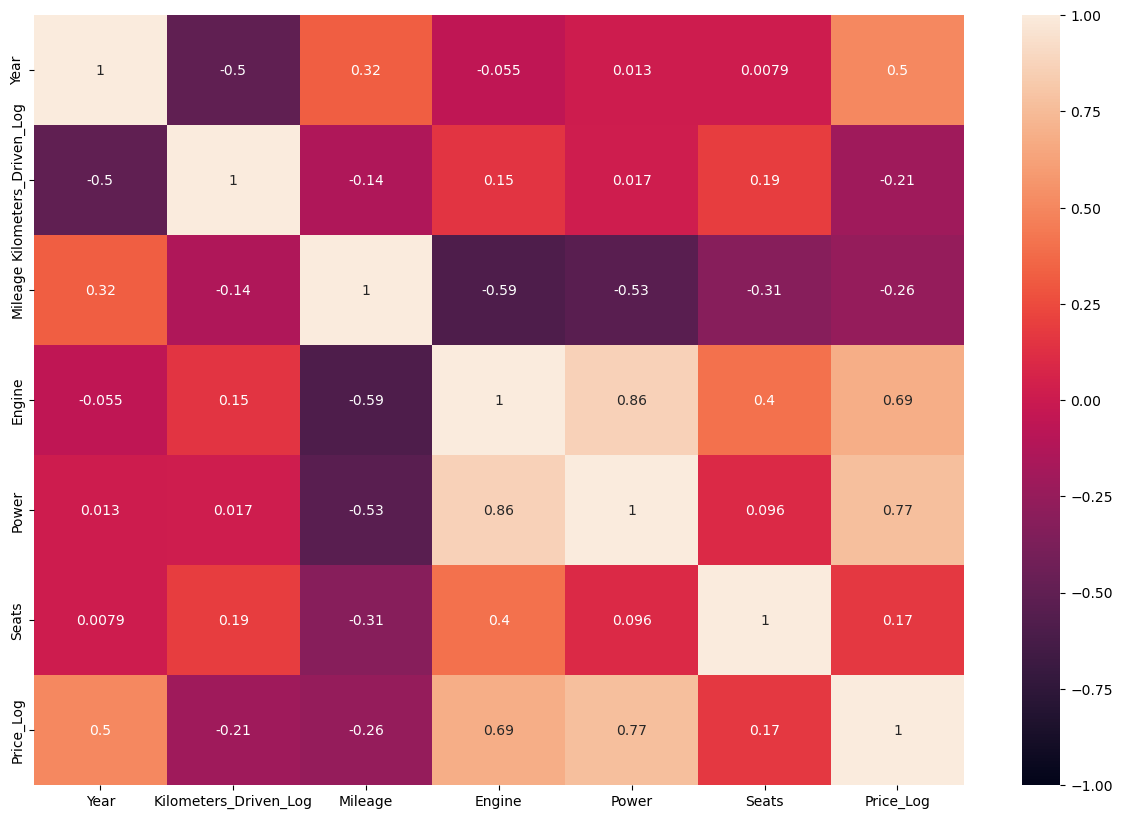

In [101]:
# In addition to the above scatter plots do a heat map to better understand
plt.figure(figsize = (15, 10))

sns.heatmap(df[['Year', 'Kilometers_Driven_Log', 'Mileage', 'Engine', 'Power', 'Seats', 'Price_Log']].corr(), annot = True, vmin = -1, vmax = 1)

plt.show()

#### Analysis of relationship between numerical variables
- Observed positive correlation between Price_Log and year(0.5) indicating newer cars have higher price
- negative correlation between price and km driven(0.21) indicating cars with higher km driven are cheaper
- slight negative correlation between price and mileage(0.26). As price increase mileage of car decreases may be because bigger cars with bigger engines and power which contribute to lower mileage

- significant positive correlation between price and engine size(0.69) indicating higher engine size cars are more expensive

- significant positive correlation between price and power(0.77) indicating higher powered cars are more expensive
- slight correlation between price and seats(0.17)

#### Analysis of relationship between categorical variables and price

- Variation of price across different locations showing price differences in different markets
- Diesel powered cars are more expensive then others
- automatic transmission cars are more expensive
- First owner cars are more expensive. Surprisingly third owner cars are sometimes cheaper than fourth owner cars.


### **Feature Engineering**

**Think about it:** The `Name` column in the current format might not be very useful in our analysis.
Since the name contains both the brand name and the model name of the vehicle, the column would have too many unique values to be useful in prediction. Can we extract that information from that column?

* **Hint:** With 2041 unique names, car names are not going to be great predictors of the price in our current data. But we can process this column to extract important information for example brand name.

In [103]:
# Extract Brand name from Name lower case

#df.info()

#df.head()
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())


In [104]:
# drop name as no longer needed
df.drop(columns = 'Name', inplace = True)

### **Missing value treatment**

In [105]:
#check for null
df.isnull().sum()

Location                    0
Year                        0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6246
Price                    1234
Price_Log                1234
Kilometers_Driven_Log       0
Brand                       0
Model                       0
dtype: int64

In [106]:
df['Seats'] = df['Seats'].fillna(df.groupby(['Brand','Model'])['Seats'].transform('median'))

In [107]:
# Check for any lingering null values
df['Seats'].isnull().sum()

3

In [108]:
df['Seats'].fillna(df['Seats'].median(),inplace=True)

In [109]:
# Check for any lingering null values
df['Seats'].isnull().sum()

0

In [110]:
from sklearn.impute import SimpleImputer
import numpy as np


# Create an imputer object using the median strategy
imputer = SimpleImputer(strategy='median')

# List of columns you want to impute
columns_to_impute = ['Mileage', 'Engine', 'Power','New_price']

# Apply the imputer to the selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# impute mileage where it is zero
df['Mileage'] = df['Mileage'].replace(0, df['Mileage'].median())


In [111]:
# check null in ['Mileage', 'Engine', 'Power']
df[['Seats','Mileage', 'Engine', 'Power']].isnull().sum()

Seats      0
Mileage    0
Engine     0
Power      0
dtype: int64

In [112]:
# check for nan in Price
df['Price'].isnull().sum()

1234

In [113]:
# delete rows where price is nan
df.dropna(subset=['Price'], inplace=True)

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Building Various Models**


1. What we want to predict is the "Price". We will use the normalized version 'Price_Log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name.
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y).
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

**Question:**

1. Why we should drop 'Name','Price','Price_Log','Kilometers_Driven' from X before splitting?

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# X should have all the indepandant variables. Dropping Kilometers_Driven since we have log version of that. Dropping Name(high cardinality) in favor of Brand()
X = df.drop(['Price','Price_Log','Kilometers_Driven'], axis = 1)


y = df[["Price_Log", "Price"]]


# convert categorical variables into dummy variables to simplify the process. The drop_first=True option is used to avoid multicollinearity which is standard.
X = pd.get_dummies(X, drop_first = True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)



(4212, 264) (1806, 264)
(4212, 2) (1806, 2)


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

In [115]:
from sklearn.linear_model import LinearRegression

# Model training
model = LinearRegression()
model.fit(X_train, y_train['Price_Log'])


LinearRegression()

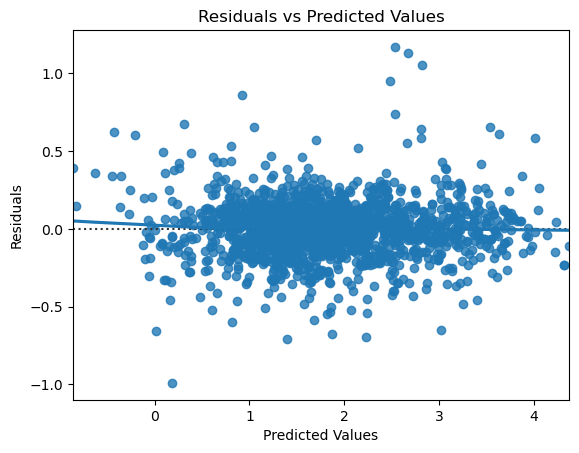

In [116]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Plotting residuals
residuals = y_test['Price_Log'] - y_test_pred
sns.residplot(x=y_test_pred, y=residuals, lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


**Homoscedasticity:** The variance of residuals seems consistent across most of the range of predicted values, although there might be slight increased variance at higher predicted values.

**Outliers:** At higher predicted values there are some outliers.

**Bias:** The residuals do not show any obvious pattern.

In [117]:
from sklearn.metrics import mean_squared_error, r2_score
# Predictions and reverse the log transformation
y_train_predict_lr = np.exp(model.predict(X_train))
y_test_predict_lr = np.exp(model.predict(X_test))

# Calculate RMSE and R² in the original scale
lr_train_rmse = mean_squared_error(y_train['Price'], y_train_predict_lr, squared=False)
lr_train_r2 = r2_score(y_train['Price'], y_train_predict_lr)
lr_test_rmse = mean_squared_error(y_test['Price'], y_test_predict_lr, squared=False)
lr_test_r2 = r2_score(y_test['Price'], y_test_predict_lr)

print(f"Training  Linear regression RMSE: {lr_train_rmse}, Training Linear regression R²: {lr_train_r2}")
print(f"Test Linear regression RMSE: {lr_test_rmse}, Test Linear regression R²: {lr_test_r2}")

Training  Linear regression RMSE: 3.063808352703267, Training Linear regression R²: 0.9301712799287922
Test Linear regression RMSE: 2.8706922245100417, Test Linear regression R²: 0.9188247101396435


### Ridge and Lasso

In [118]:
from sklearn.linear_model import Ridge, Lasso


ridge_reg = Ridge()
lasso_reg = Lasso()

# Fit
ridge_reg.fit(X_train, y_train['Price_Log'])
lasso_reg.fit(X_train, y_train['Price_Log'])

y_train_predict_ridge = np.exp(ridge_reg.predict(X_train))
y_test_predict_ridge = np.exp(ridge_reg.predict(X_test))

y_train_predict_lasso = np.exp(lasso_reg.predict(X_train))
y_test_predict_lasso = np.exp(lasso_reg.predict(X_test))

# Calculate RMSE and R² in the original scale
ridge_train_rmse = mean_squared_error(y_train['Price'], y_train_predict_ridge, squared=False)
ridge_train_r2 = r2_score(y_train['Price'], y_train_predict_ridge)

ridge_test_rmse = mean_squared_error(y_test['Price'], y_test_predict_ridge, squared=False)
ridge_test_r2 = r2_score(y_test['Price'], y_test_predict_ridge)

print(f"Ridge Train RMSE : {ridge_train_rmse}, Ridge Train R²: {ridge_train_r2}")
print(f"Ridge Test RMSE : {ridge_test_rmse}, Ridge Test R²: {ridge_test_r2}")


lasso_train_rmse = mean_squared_error(y_train['Price'], y_train_predict_lasso, squared=False)
lasso_train_r2 = r2_score(y_train['Price'], y_train_predict_lasso)

lasso_test_rmse = mean_squared_error(y_test['Price'], y_test_predict_lasso, squared=False)
lasso_test_r2 = r2_score(y_test['Price'], y_test_predict_lasso)

print(f"Lasso Train RMSE : {lasso_train_rmse}, Lasso Train R²: {lasso_train_r2}")
print(f"Lasso Test RMSE : {lasso_test_rmse}, Lasso Test R²: {lasso_test_r2}")


Ridge Train RMSE : 3.159894467240121, Ridge Train R²: 0.9257227105396579
Ridge Test RMSE : 2.702922633569594, Ridge Test R²: 0.928035582900645
Lasso Train RMSE : 25.97081760363976, Lasso Train R²: -4.017439382489177
Lasso Test RMSE : 27.59144174940696, Lasso Test R²: -6.498931233602463


Ridge model outperfoms the Lasso model

### Decision Tree

In [119]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=10)
dt_model.fit(X_train, y_train['Price_Log'])

# Predicting and Evaluating the Decision Tree Model
y_train_predict_dt = np.exp(dt_model.predict(X_train))
y_test_predict_dt = np.exp(dt_model.predict(X_test))


# Calculate RMSE and R2 of train and test
dt_tain_rmse = mean_squared_error(y_train['Price'], y_train_predict_dt, squared=False)
dt_train_r2 = r2_score(y_train['Price'], y_train_predict_dt)

dt_test_rmse = mean_squared_error(y_test['Price'], y_test_predict_dt, squared=False)
dt_test_r2 = r2_score(y_test['Price'], y_test_predict_dt)

print(f"Decision Tree Train RMSE : {dt_tain_rmse}, Decision Tree Train R²: {dt_train_r2}")
print(f"Decision Tree Test RMSE : {dt_test_rmse}, Decision Tree Test R²: {dt_test_r2}")


Decision Tree Train RMSE : 0.02354806783025228, Decision Tree Train R²: 0.9999958750238079
Decision Tree Test RMSE : 4.166230146044718, Decision Tree Test R²: 0.8290232347739499


### Random Forest

In [120]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train['Price_Log'])

# Predicting and Evaluating the Random Forest Model
y_train_predict_rf = np.exp(rf_model.predict(X_train))
y_test_predict_rf = np.exp(rf_model.predict(X_test))

# Calculate RMSE and R2 of train and test
rf_tain_rmse = mean_squared_error(y_train['Price'], y_train_predict_rf, squared=False)
rf_train_r2 = r2_score(y_train['Price'], y_train_predict_rf)

rf_test_rmse = mean_squared_error(y_test['Price'], y_test_predict_rf, squared=False)
rf_test_r2 = r2_score(y_test['Price'], y_test_predict_rf)

# Print metrics
print(f"Random Forest Train RMSE : {rf_tain_rmse}, Random Forest Train R²: {rf_train_r2}")
print(f"Random Forest Test RMSE : {rf_test_rmse}, Random Forest Test R²: {rf_test_r2}")

Random Forest Train RMSE : 1.8662317343291395, Random Forest Train R²: 0.9740915142884135
Random Forest Test RMSE : 2.9775229435545447, Random Forest Test R²: 0.9126705318126104


### **Hyperparameter Tuning: Decision Tree**

In [121]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
# param_grid = {
#     'max_depth': [None, 10, 15,20, 25, 30],
#     'min_samples_split': [2, 8, 10, 20,30,40],
#     'min_samples_leaf': [1, 2, 4,8],
#     'max_features': ['auto', 'sqrt', 'log2', None]
# }

dt_param_grid = {
    'max_depth': [24, 25,26],
    'min_samples_split': [15,18,20,29,32],
    'min_samples_leaf': [1],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize the GridSearchCV object
dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                              param_grid=dt_param_grid,
                              scoring='neg_root_mean_squared_error',
                              cv=5,  # 5-fold cross-validation
                              n_jobs=-1,  # Use all available cores
                              verbose=1)


# Fit the grid search to the data
dt_grid_search.fit(X_train, y_train)

dtree_tuned_model = dt_grid_search.best_estimator_

dtree_tuned_model.fit(X_train, y_train['Price_Log'])

# Predicting and Evaluating the Decision Tree Model
y_train_predict_dtree_tuned = np.exp(dtree_tuned_model.predict(X_train))
y_test_predict_dtree_tuned = np.exp(dtree_tuned_model.predict(X_test))


# Calculate RMSE and R2 of train and test
dtree_tuned_tain_rmse = mean_squared_error(y_train['Price'], y_train_predict_dtree_tuned, squared=False)
dtree_tuned_train_r2 = r2_score(y_train['Price'], y_train_predict_dtree_tuned)

dtree_tuned_test_rmse = mean_squared_error(y_test['Price'], y_test_predict_dtree_tuned, squared=False)
dtree_tuned_test_r2 = r2_score(y_test['Price'], y_test_predict_dtree_tuned)

print(f"Decision Tree Tuned Train RMSE : {dtree_tuned_tain_rmse}, Decision Tree Tuned Train R²: {dtree_tuned_train_r2}")
print(f"Decision Tree Tuned Test RMSE : {dtree_tuned_test_rmse}, Decision Tree Tuned Test R²: {dtree_tuned_test_r2}")




Fitting 5 folds for each of 60 candidates, totalling 300 fits
Decision Tree Tuned Train RMSE : 2.722317470744597, Decision Tree Tuned Train R²: 0.9448699443798163
Decision Tree Tuned Test RMSE : 4.0359062011748685, Decision Tree Tuned Test R²: 0.8395525901558127


In [122]:
# Print best_params_
print(dt_grid_search.best_params_)

{'max_depth': 25, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 15}


**Feature Importance**

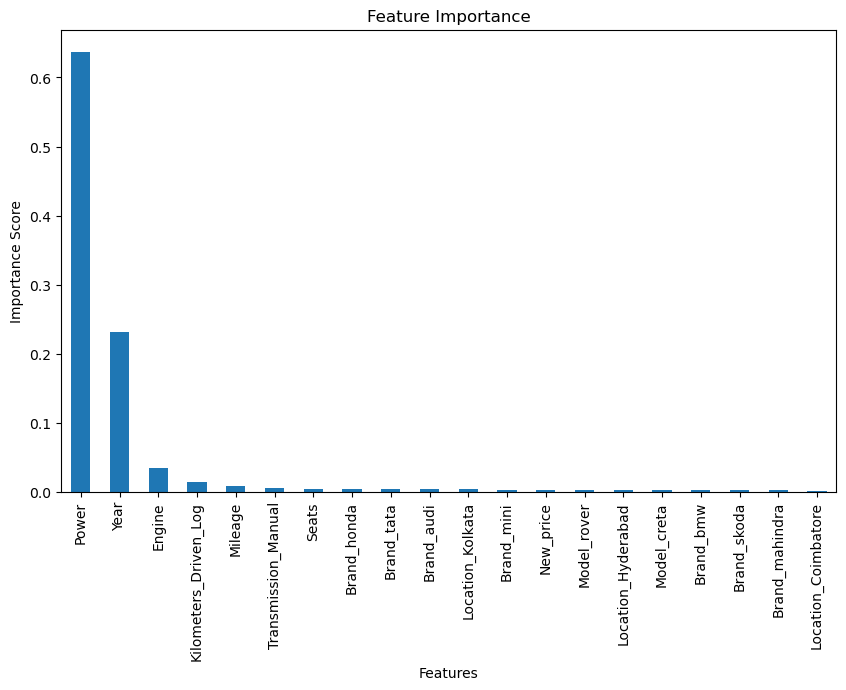

In [123]:
# find 20 top features
features_20 = pd.Series(dtree_tuned_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

# Plot 20 top features
plt.figure(figsize=(10, 6))
features_20.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

### **Hyperparameter Tuning: Random Forest**

In [131]:
# Init GridSearchCV

# random trial and error found this to be best {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
rf_param_grid = {
    'n_estimators': [ 200],
    'max_depth': [20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=rf_param_grid,
                              scoring='neg_root_mean_squared_error',  # Using RMSE for optimization
                              cv=2,  # 2-fold cross-validation
                              verbose=1,  # Show detailed progress
                              n_jobs=-1)  # Use all available CPU cores

rf_grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search

rf_tuned_model = rf_grid_search.best_estimator_

rf_tuned_model.fit(X_train, y_train['Price_Log'])

# Predicting and Evaluating the Decision Tree Model
y_train_predict_rf_tuned = np.exp(rf_tuned_model.predict(X_train))
y_test_predict_rf_tuned = np.exp(rf_tuned_model.predict(X_test))


# Calculate RMSE and R2 of train and test
rf_tuned_tain_rmse = mean_squared_error(y_train['Price'], y_train_predict_rf_tuned, squared=False)
rf_tuned_train_r2 = r2_score(y_train['Price'], y_train_predict_rf_tuned)

rf_tuned_test_rmse = mean_squared_error(y_test['Price'], y_test_predict_rf_tuned, squared=False)
rf_tuned_test_r2 = r2_score(y_test['Price'], y_test_predict_rf_tuned)

print(f"Random Forest Tuned Train RMSE : {rf_tuned_tain_rmse}, Random Forest Tuned Train R²: {rf_tuned_train_r2}")
print(f"Random Forest Tuned Test RMSE : {rf_tuned_test_rmse}, Random Forest Tuned Test R²: {rf_tuned_test_r2}")


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Random Forest Tuned Train RMSE : 1.8091035593844669, Random Forest Tuned Train R²: 0.9756534321994101
Random Forest Tuned Test RMSE : 2.8899515265464415, Random Forest Tuned Test R²: 0.9177318561434261


In [126]:
# Print best_params_
print(rf_grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


**Feature Importance**

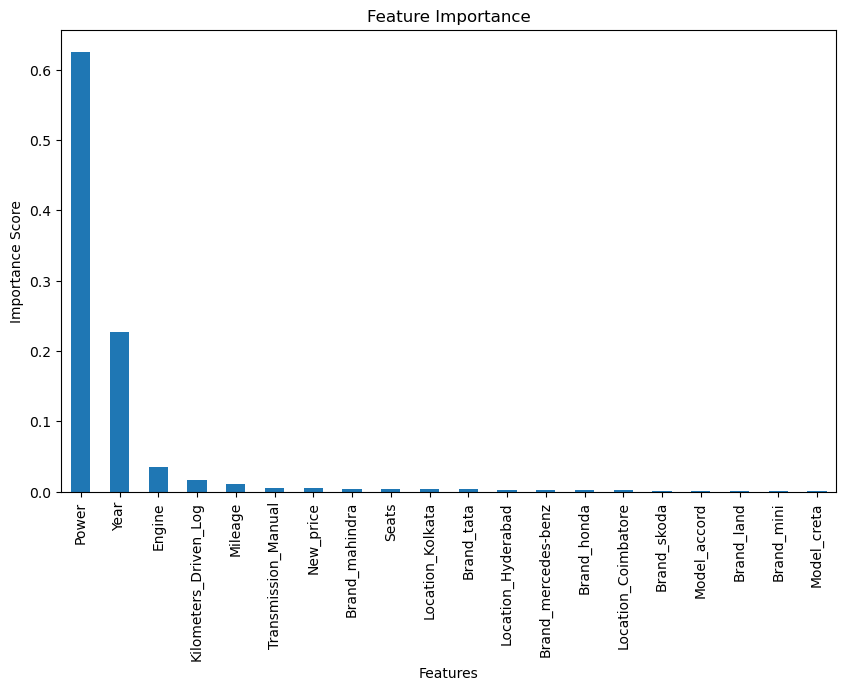

In [129]:
# find 20 top features
rf_features_20 = pd.Series(rf_tuned_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(20)

# Plot 20 top features
plt.figure(figsize=(10, 6))
rf_features_20.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()